<Axes: >

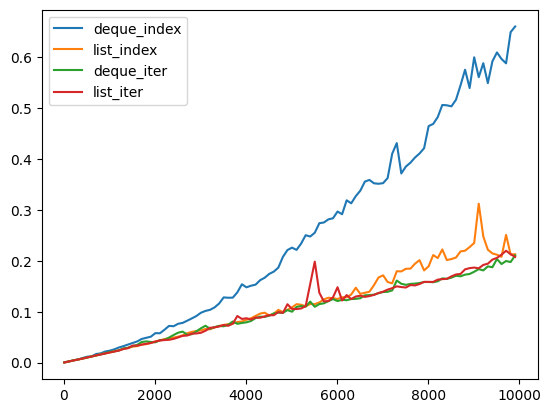

In [2]:
import timeit
import pandas as pd
from collections import deque


def build_deque(n):
    return deque(range(n))

def build_list(n):
    return list(range(n))

def iter_index(d):
    for i in range(len(d)):
        d[i]

def iter_iter(d):
    d_iter = iter(d)
    while True:
        try:
            next(d_iter)
        except StopIteration:
            break

r = range(10, 10001, 100)

list_index_runs = [timeit.timeit('iter_index(l)', 'from __main__ import build_list, iter_index; l = build_list({})'.format(n), number=1000) for n in r]
deque_index_runs = [timeit.timeit('iter_index(d)', 'from __main__ import build_deque, iter_index; d = build_deque({})'.format(n), number=1000) for n in r]
deque_iter_runs = [timeit.timeit('iter_iter(d)', 'from __main__ import build_deque, iter_iter; d = build_deque({})'.format(n), number=1000) for n in r]
list_iter_runs = [timeit.timeit('iter_iter(d)', 'from __main__ import build_list, iter_iter; d = build_list({})'.format(n), number=1000) for n in r]

df = pd.DataFrame({'deque_index':deque_index_runs, 'list_index':list_index_runs, 'deque_iter': deque_iter_runs, 'list_iter': list_iter_runs}, index=r)
df.plot()

In [3]:
df

,deque_index,list_index,deque_iter,list_iter
10,0.000273,0.000304,0.000478,0.000373
110,0.002076,0.002127,0.002486,0.002314
210,0.004297,0.004357,0.004349,0.004251
310,0.005892,0.005852,0.006395,0.006101
410,0.008877,0.007758,0.007936,0.008010
...,...,...,...,...
9510,0.609262,0.211980,0.203442,0.205729
9610,0.596417,0.207815,0.193642,0.212049
9710,0.587846,0.250871,0.199543,0.219718
9810,0.649086,0.212427,0.197533,0.212923
